# Table of Contents

* [Data Cleaning](#Data_Cleaning)
    * [Handle wrong featuers type](#wrong_type)
    * [Handle unlogical values for numircal and catagorial featuers](#unlogic_data)<br>
        *[Handle unlogical data in numircal featuers](#unlogic_numirc)<br>
        *[Handle unlogical data in catagorial featuers](#unlogic_cata)
    * [Handling Missing data](#missing_values)
* [Exploratory data analysis(EDA)](#EDA)
* [Data Clustring](#cluster)

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customer_df = pd.read_csv('customers.csv')
customer_df.head(20)

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount
0,47,اخري,100123.0,الهرم,Giza,الهرم,29.99344,31.15219,2020-07-06,523.786667,3.0,3.0,2020-11-12,1571.36
1,634,كشك,100140.0,مصر القديمة,Cairo,مصر القديمة,NaN,NaN,2020-01-20,2665.551667,6.0,4.0,2020-08-07,15993.31
2,841,اخري,100128.0,المعادي,Cairo,NaN,NaN,NaN,2020-01-23,1459.375000,6.0,2.0,2020-12-15,8756.25
3,863,اخري,100128.0,المعادي,Cairo,المعادي,NaN,NaN,2020-01-23,NaN,NaN,NaN,NaN,NaN
4,986,اخري,100125.0,حلوان,Cairo,المعصرة,29.84495,31.33025,2020-01-27,5618.270000,1.0,1.0,2020-06-14,5618.27
5,1008,كشك,100128.0,المعادي,Cairo,المعادي,NaN,NaN,2020-01-28,NaN,NaN,NaN,NaN,NaN
6,1068,اخري,100125.0,حلوان,Cairo,حدايق حلوان,NaN,NaN,2020-01-21,1989.783333,18.0,11.0,2021-03-01,35816.10
7,1119,اخري,100128.0,المعادي,Cairo,المعادي,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN
8,1492,اخري,100206.0,المريوطيه - فيصل,Giza,المريوطيه - فيصل,NaN,NaN,2020-01-28,5664.990000,5.0,1.0,2021-03-06,28324.95
9,1516,اخري,100000.0,Others,Cairo,Others,NaN,NaN,2020-01-28,NaN,NaN,NaN,NaN,NaN


## Data Cleaning <a class="anchor" id="Data_Cleaning"></a>

### Handle wrong featuers type <a class="anchor" id="wrong_type"></a>

In [3]:
#using info function to check the data types for every featuer
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       9814 non-null   int64  
 1   buyer_business_type               9801 non-null   object 
 2   district_id                       9803 non-null   float64
 3   district_name_ar                  9803 non-null   object 
 4   city_name_en                      9803 non-null   object 
 5   area_name_ar                      9403 non-null   object 
 6   geo_latitude                      8142 non-null   float64
 7   geo_longitude                     8142 non-null   float64
 8   registration_date                 9814 non-null   object 
 9   avg_ticket_size                   4627 non-null   float64
 10  number_of_transactions            4627 non-null   float64
 11  number_of_cancelled_transactions  4627 non-null   float64
 12  last_o

**1- convert the customer_id and district_id to catagorial variables**<br>
**2- convert the registration_date and last_order_date to date time variables**

In [4]:
customer_df['customer_id']= customer_df['customer_id'].astype(str)
customer_df['district_id']= customer_df['district_id'].astype(str)
customer_df['registration_date']= pd.to_datetime(customer_df['registration_date'])
customer_df['last_order_date']= pd.to_datetime(customer_df['last_order_date'])

#check data types again
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   customer_id                       9814 non-null   object        
 1   buyer_business_type               9801 non-null   object        
 2   district_id                       9814 non-null   object        
 3   district_name_ar                  9803 non-null   object        
 4   city_name_en                      9803 non-null   object        
 5   area_name_ar                      9403 non-null   object        
 6   geo_latitude                      8142 non-null   float64       
 7   geo_longitude                     8142 non-null   float64       
 8   registration_date                 9814 non-null   datetime64[ns]
 9   avg_ticket_size                   4627 non-null   float64       
 10  number_of_transactions            4627 non-null 

### Handle unlogical values  <a class="anchor" id="unlogic_data"></a>

#### Handle unlogical data in numirc featuers<a class="anchor" id="unlogic_numirc"></a>

In [5]:
#get discriptive statistics to check the unlogical outliers and unlogical values for numirc featuers
customer_df.describe()

,geo_latitude,geo_longitude,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,total_orders_amount
count,8142.000000,8142.000000,4627.000000,4627.000000,4627.000000,4.627000e+03
mean,30.168256,31.051191,2130.411682,4.795116,1.565593,1.651255e+04
std,1.095282,1.176232,2954.012527,8.353255,3.246430,1.776301e+05
min,-5.096980,-16.360670,4.300000,1.000000,0.000000,4.300000e+00
25%,30.011608,31.180060,860.836000,1.000000,0.000000,1.691085e+03
50%,30.080700,31.217100,1423.868889,3.000000,1.000000,4.251890e+03
75%,30.135307,31.282128,2428.625000,5.000000,2.000000,1.039473e+04
max,38.760990,31.537000,94059.175368,253.000000,92.000000,8.935622e+06


#### Insights from above discriptive statistics
**1- avg_ticket_size is covering heigh range from very low size to very heigh that maybe for big supermarket which is good because it's indicate that the company cover very large of customer segments but on the other hand it's maybe unlogical outliers so we will discover it in EDA part**<br>
**2- also the number of transaction the max number is heigh so we need to check if it unlogical outliers in EDA part**<br>
**3- the number_of_cancelled_transactions mean have hiegh value in compare with number_of_transactions at all so we need to study how to reduce the number_of_cancelled_transactions**

#### From above discriptive statistics we need to do the following
**1-handle the negtive value in geo_longitude and geo_latitude because there is no nigtive longitude or latidude in egypt**<br>
**2-Make sure about the min value in avg_ticket_size and check if there is normal to be there a very low price or this is unlogic value and need to handle**

In [6]:
#show the negative values in the table
neg_lat_long = customer_df[(customer_df['geo_latitude'] < 0) | (customer_df['geo_longitude'] < 0)] 
neg_lat_long

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount
3519,17505,سوبر ماركت,100128.0,المعادي,Cairo,المعادي,-5.09698,-16.36067,2020-07-27,NaN,NaN,NaN,NaT,NaN


In [7]:
#convert the negtive value to postive
customer_df['geo_latitude'] = customer_df['geo_latitude'].abs()
customer_df['geo_longitude'] = customer_df['geo_longitude'].abs()

#make sure negtive values handeled
neg_lat_long = customer_df[(customer_df['geo_latitude'] < 0) | (customer_df['geo_longitude'] < 0)] 
neg_lat_long

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount


In [8]:
#show the unlogic low avg_ticket_size
#We can assume that min price in wholesale trade is 10 pounds for gum product as exaample
low_ticket = customer_df[customer_df['avg_ticket_size'] < 10] 
low_ticket

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount
1907,8434,سوبر ماركت,100131.0,المطرية,Cairo,عرب أبو طويلة,30.13931,31.31629,2020-06-06,4.3,1.0,0.0,2020-07-05,4.3


**It's a real transaction with real information so we can not igoner it and assume this price is exclusive and attractive offer for this user**

In [9]:
customer_df.describe()

,geo_latitude,geo_longitude,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,total_orders_amount
count,8142.000000,8142.000000,4627.000000,4627.000000,4627.000000,4.627000e+03
mean,30.169508,31.055210,2130.411682,4.795116,1.565593,1.651255e+04
std,1.060231,1.064845,2954.012527,8.353255,3.246430,1.776301e+05
min,0.000000,0.000000,4.300000,1.000000,0.000000,4.300000e+00
25%,30.011608,31.180060,860.836000,1.000000,0.000000,1.691085e+03
50%,30.080700,31.217100,1423.868889,3.000000,1.000000,4.251890e+03
75%,30.135307,31.282128,2428.625000,5.000000,2.000000,1.039473e+04
max,38.760990,31.537000,94059.175368,253.000000,92.000000,8.935622e+06


### Handle unlogical data in catagorial featuers<a class="anchor" id="unlogic_cata"></a>

In [10]:
#get discriptive statistics to check the unlogical outliers and unlogical values for catagorial featuers
cata_cols = customer_df.select_dtypes(include=['object'])
cata_cols.describe()

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar
count,9814,9801,9814,9803,9803,9403
unique,9810,8,78,75,2,200
top,26661,سوبر ماركت,100119.0,فيصل,Cairo,شبرا الخيمة
freq,2,6848,917,917,6447,763


#### Insights from above discriptive statistics
**1- we cover 8 different types of bussiness type and most powerful type is supermarket with frquancey equal to 6848 supermarket**<br>
**2- We cover 75 district and most district use our service is فيصل with frequancy equal to 917**<br>
**3- also for area_name the most area use our service is شبرا الخيمة with frequancy equal to 763**

#### From above discriptive statistics we need to do the following
**1- check and remove duplicate records in customer id**<br>
**2- check why there is adifference between district_id and district_name_ar in unique values**<br>


In [11]:
#Get information about different values in all catagorial features to study if there is a missing or unlogical values 
for col in customer_df.select_dtypes(include=['object']):
    print(f'For column {col}\n------------------\n')
    print(customer_df[col].value_counts())
    print('\n')

For column customer_id
------------------

26661    2
17148    2
32552    2
33126    2
2978     1
        ..
18375    1
14880    1
14971    1
8608     1
21695    1
Name: customer_id, Length: 9810, dtype: int64


For column buyer_business_type
------------------

سوبر ماركت         6848
اخري               1134
كشك                1020
عطارة               600
قهوه                 80
منظفات               69
TKA Supermarket      32
مطعم                 18
Name: buyer_business_type, dtype: int64


For column district_id
------------------

100119.0    917
100143.0    768
100128.0    640
100110.0    531
100123.0    492
           ... 
100103.0      2
100212.0      2
100208.0      1
3.0           1
100207.0      1
Name: district_id, Length: 78, dtype: int64


For column district_name_ar
------------------

فيصل               917
شبرا الخيمة        768
المعادي            640
المرج              531
الهرم              492
                  ... 
المريوطيه - هرم      2
التجمع الخامس        2
بهرمس 

#### Insights from above categories
**1-We have unclear catagory called TKA supermarket which is we need to understand what it represent**<br>
**2- our service is much more popular in cairo than giza but on the other hand the فيصل district is te most popular district**<br>
**3- "اخري" busnisess type have heigh ratio so we need to solve it to known category**

In [12]:
#check and remove duplicate records in customer id
customer_df[customer_df.duplicated(subset='customer_id') == True]

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount
3432,17148,سوبر ماركت,100151.0,عزبة النخل,Cairo,عزبة النخل,30.14405,31.32775,2020-07-22,892.126,5.0,3.0,2020-09-29,4460.63
4684,33126,عطارة,100126.0,امبابة,Giza,NaN,30.08516,31.20347,2020-10-25,NaN,NaN,NaN,NaT,NaN
8540,32552,سوبر ماركت,100143.0,شبرا الخيمة,Cairo,شبرا الخيمة,31.25070,30.12449,2020-10-24,499.800,1.0,1.0,2020-10-24,499.80
9811,26661,مطعم,100184.0,شبرا الخيمه,Cairo,شبرا الخيمه,30.14735,31.23896,2020-10-04,NaN,NaN,NaN,NaT,NaN


In [13]:
#drop all duplicates
customer_df.drop_duplicates(keep='first',inplace=True)
customer_df[customer_df.duplicated(subset='customer_id') == True]

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount


In [14]:
#check why distract id have unique more than district name
#first check if there is nan values in district_name and not nan is district_id
nan_names = customer_df[(customer_df['district_id'] != 'nan') & (customer_df['district_name_ar'].isnull())]
nan_names

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount


In [15]:
#check nan values on both of them
nan_names = customer_df[(customer_df['district_id'] =='nan') & (customer_df['district_name_ar'].isnull())]
nan_names

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount
4235,16303,NaN,nan,NaN,NaN,NaN,NaN,NaN,2020-07-18,162.0,4.0,4.0,2020-08-13,648.0
4755,31200,NaN,nan,NaN,NaN,NaN,NaN,NaN,2020-10-20,NaN,NaN,NaN,NaT,NaN
4756,32991,NaN,nan,NaN,NaN,NaN,NaN,NaN,2020-10-25,NaN,NaN,NaN,NaT,NaN
4757,34083,NaN,nan,NaN,NaN,NaN,NaN,NaN,2020-10-27,NaN,NaN,NaN,NaT,NaN
4772,29682,NaN,nan,NaN,NaN,NaN,NaN,NaN,2020-10-17,NaN,NaN,NaN,NaT,NaN
4773,30778,NaN,nan,NaN,NaN,NaN,NaN,NaN,2020-10-19,NaN,NaN,NaN,NaT,NaN
4774,32365,NaN,nan,NaN,NaN,NaN,NaN,NaN,2020-10-23,NaN,NaN,NaN,NaT,NaN
4775,34498,NaN,nan,NaN,NaN,NaN,NaN,NaN,2020-10-28,NaN,NaN,NaN,NaT,NaN
4776,34677,NaN,nan,NaN,NaN,NaN,NaN,NaN,2020-10-28,NaN,NaN,NaN,NaT,NaN
4777,34868,NaN,nan,NaN,NaN,NaN,NaN,NaN,2020-10-29,NaN,NaN,NaN,NaT,NaN


**We can note that most of this record don't have valuble data espacially in case we want to cluster according to location so will just drop them**

In [16]:
#drop pervious rows because it's not contain valuble information 
customer_df.drop(customer_df[(customer_df['district_id'] =='nan') & (customer_df['district_name_ar'].isnull())].index, inplace = True)
nan_names = customer_df[(customer_df['district_id'] =='nan') & (customer_df['district_name_ar'].isnull())]
nan_names

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount


In [17]:
#check difference between district_id and district_name again
cata_cols.describe()

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar
count,9814,9801,9814,9803,9803,9403
unique,9810,8,78,75,2,200
top,26661,سوبر ماركت,100119.0,فيصل,Cairo,شبرا الخيمة
freq,2,6848,917,917,6447,763


**Problem still exist so we can check the unique values it self because maybe ther are spelling mistake that due this error**

In [18]:
#To get the unique values for both columns with each other we can sum them in one dummy column to discover them
print(customer_df['district_id'].unique().shape)
print(customer_df['district_name_ar'].unique().shape)

#check for duplicated unquie id values
unqi = customer_df.groupby(['district_id','district_name_ar'])
print(unqi.size().reset_index().duplicated(subset='district_id').value_counts())

#check for duplicated unquie name values
print(unqi.size().reset_index().duplicated(subset='district_name_ar').value_counts())

(77,)
(75,)
False    77
dtype: int64
False    75
True      2
dtype: int64


**so we have two district have different 2 ids so we need to handle it**

In [19]:
unq_df = unqi.size().reset_index()
print(unq_df[unq_df.duplicated(subset='district_name_ar')==True])

   district_id district_name_ar   0
25    100130.0           المنيل  23
58    100183.0            بهتيم   2


In [20]:
unq_df[(unq_df['district_name_ar'] == 'المنيل') | (unq_df['district_name_ar'] == 'بهتيم')]

,district_id,district_name_ar,0
10,100109.0,المنيل,33
25,100130.0,المنيل,23
54,100172.0,بهتيم,41
58,100183.0,بهتيم,2


**so all we need to do is unit the same district in one id**

In [21]:
unq_df.loc[unq_df.district_name_ar == "المنيل", "district_id"] = "100109.0"
unq_df.loc[unq_df.district_name_ar == "بهتيم", "district_id"] = "100172.0"
unq_df[(unq_df['district_name_ar'] == 'المنيل') | (unq_df['district_name_ar'] == 'بهتيم')]

,district_id,district_name_ar,0
10,100109.0,المنيل,33
25,100109.0,المنيل,23
54,100172.0,بهتيم,41
58,100172.0,بهتيم,2


In [22]:
customer_df.loc[customer_df.district_name_ar == "المنيل", "district_id"] = "100109.0"
customer_df.loc[customer_df.district_name_ar == "بهتيم", "district_id"] = "100172.0"

In [23]:
customer_df[(customer_df['district_name_ar'] == 'المنيل') | (customer_df['district_name_ar'] == 'بهتيم')]['district_id'].unique()

array(['100172.0', '100109.0'], dtype=object)

In [24]:
#final check
cata_cols = customer_df.select_dtypes(include=['object'])
cata_cols.describe()

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar
count,9799,9797,9799,9799,9799,9400
unique,9799,8,75,75,2,200
top,14388,سوبر ماركت,100119.0,فيصل,Cairo,شبرا الخيمة
freq,1,6846,917,917,6444,762


### Handling Missing data <a class="anchor" id="missing_values"></a>

In [25]:
#to clerify the number of nan values in every featuer have nans
nan_col = customer_df.isna().sum()[customer_df.isna().sum() != 0]
print(nan_col)

buyer_business_type                    2
area_name_ar                         399
geo_latitude                        1661
geo_longitude                       1661
avg_ticket_size                     5175
number_of_transactions              5175
number_of_cancelled_transactions    5175
last_order_date                     5175
total_orders_amount                 5175
dtype: int64


**For missing data I will follow next approches**<br>
**1- as the buyer business_type is only have 2 nan value so we need to show them to see if they have other important value or just drop them**<br>
**2- for area_name_ar we can take district name as most of point already are**<br>
**3- for geo_lat and long we can get using avg of lang and lat for the same area_name_ar**<br>
**4- for other column most porpbley the nan in this column is because this customer don't make transaction yet so we just need to replace with zero and with deafult date for datetime objects**

In [26]:
nan_buyer_type = customer_df[(customer_df['buyer_business_type'].isnull())]
nan_buyer_type

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount
2996,16864,NaN,100123.0,الهرم,Giza,NaN,NaN,NaN,2020-07-20,NaN,NaN,NaN,NaT,NaN
4877,6,NaN,3.0,Test Haram,Giza,NaN,NaN,NaN,2020-06-30,NaN,NaN,NaN,NaT,NaN


**This two users don't have business type but have location that is may help us in clustring according to location so we will keep them and replacing the buyer_business_type with most frequant value for this column (supermarket) because this type is cover alot of target segments and have many similerities with other catagories in needed items.**<br>
**All of that because if we target thim with offer after puting thim in specific cluster it's may encourge him to activate his account and continue their information**

In [27]:
customer_df['buyer_business_type'].fillna('سوبر ماركت',inplace=True)
nan_buyer_type = customer_df[(customer_df['buyer_business_type'].isnull())]
nan_buyer_type

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount


In [28]:
# replace the missing values in area_name with distract_name for same record
customer_df['area_name_ar'].fillna(customer_df['district_name_ar'], inplace=True)
customer_df[(customer_df['area_name_ar'].isnull())]

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount


In [29]:
type(customer_df['geo_latitude'][0])

numpy.float64

In [30]:
#replace geo_latidude and longitude with the averge lat and long for same area_name
customer_df['geo_latitude']= customer_df['geo_latitude'].astype('float64')
customer_df['geo_longitude']= customer_df['geo_longitude'].astype('float64')
customer_df['geo_latitude'] = customer_df.groupby(['area_name_ar'])['geo_latitude'].apply(lambda x: x.fillna(x.mean()))
customer_df['geo_longitude'] = customer_df.groupby(['area_name_ar'])['geo_longitude'].apply(lambda x: x.fillna(x.mean()))
customer_df[(customer_df['geo_latitude'].isnull()) | (customer_df['geo_longitude'].isnull())]

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount
741,1940,اخري,100163.0,منشية ناصر,Cairo,الدويقة,NaN,NaN,2020-01-30,NaN,NaN,NaN,NaT,NaN
990,2512,اخري,100102.0,التجمع الاول,Cairo,التجمع الاول,NaN,NaN,2020-02-04,NaN,NaN,NaN,NaT,NaN
1014,2587,اخري,100102.0,التجمع الاول,Cairo,التجمع الاول,NaN,NaN,2020-02-04,NaN,NaN,NaN,NaT,NaN
4877,6,سوبر ماركت,3.0,Test Haram,Giza,Test Haram,NaN,NaN,2020-06-30,NaN,NaN,NaN,NaT,NaN
4934,2514,اخري,100102.0,التجمع الاول,Cairo,التجمع الاول,NaN,NaN,2020-02-04,NaN,NaN,NaN,NaT,NaN
4942,2619,اخري,100197.0,الحوامدية,Giza,الحوامدية,NaN,NaN,2020-02-04,NaN,NaN,NaN,NaT,NaN
5091,13205,اخري,100102.0,التجمع الاول,Cairo,التجمع الاول,NaN,NaN,2020-01-31,1617.350000,5.0,3.0,2021-02-11,8086.75
5373,1514,اخري,100197.0,الحوامدية,Giza,الحوامدية,NaN,NaN,2020-01-28,NaN,NaN,NaN,NaT,NaN
5841,3125,اخري,100159.0,حي الجيزة,Giza,البدرشين,NaN,NaN,2020-07-12,16641.285000,4.0,3.0,2020-10-14,66565.14
7833,9474,سوبر ماركت,100169.0,المنيب,Giza,جزيرة الدهب,NaN,NaN,2020-06-09,1269.017143,7.0,0.0,2020-10-15,8883.12


**the most probably reason why there still nan values in lat and long because that this area names don't have lat and long so lets try with ditrict name as another solution**

In [31]:
customer_df['geo_latitude'] = customer_df.groupby(['district_name_ar'])['geo_latitude'].apply(lambda x: x.fillna(x.mean()))
customer_df['geo_longitude'] = customer_df.groupby(['district_name_ar'])['geo_longitude'].apply(lambda x: x.fillna(x.mean()))
customer_df[(customer_df['geo_latitude'].isnull()) | (customer_df['geo_longitude'].isnull())]

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount
990,2512,اخري,100102.0,التجمع الاول,Cairo,التجمع الاول,NaN,NaN,2020-02-04,NaN,NaN,NaN,NaT,NaN
1014,2587,اخري,100102.0,التجمع الاول,Cairo,التجمع الاول,NaN,NaN,2020-02-04,NaN,NaN,NaN,NaT,NaN
4877,6,سوبر ماركت,3.0,Test Haram,Giza,Test Haram,NaN,NaN,2020-06-30,NaN,NaN,NaN,NaT,NaN
4934,2514,اخري,100102.0,التجمع الاول,Cairo,التجمع الاول,NaN,NaN,2020-02-04,NaN,NaN,NaN,NaT,NaN
4942,2619,اخري,100197.0,الحوامدية,Giza,الحوامدية,NaN,NaN,2020-02-04,NaN,NaN,NaN,NaT,NaN
5091,13205,اخري,100102.0,التجمع الاول,Cairo,التجمع الاول,NaN,NaN,2020-01-31,1617.35,5.0,3.0,2021-02-11,8086.75
5373,1514,اخري,100197.0,الحوامدية,Giza,الحوامدية,NaN,NaN,2020-01-28,NaN,NaN,NaN,NaT,NaN


**The test Haram record is most probably is not actual user so we need to drop it and get the other lat and long using google search**

In [32]:
#drop test haram record
customer_df.drop(customer_df[(customer_df['area_name_ar'] =='Test Haram')].index, inplace = True)

#replace every area with it's lat and long using google search
customer_df.loc[customer_df.district_name_ar == "التجمع الاول", "geo_latitude"] = 30.0672
customer_df.loc[customer_df.district_name_ar == "التجمع الاول", "geo_longitude"] = 31.4611
customer_df.loc[customer_df.district_name_ar == "الحوامدية", "geo_latitude"] = 29.89602
customer_df.loc[customer_df.district_name_ar == "الحوامدية", "geo_longitude"] = 31.260869


In [33]:
customer_df[(customer_df['geo_latitude'].isnull()) | (customer_df['geo_longitude'].isnull())]

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount


In [34]:
# customer_df[customer_df['district_name_ar'] == 'الحوامدية']

In [35]:
#check nan values again
nan_col = customer_df.isna().sum()[customer_df.isna().sum() != 0]
print(nan_col)

avg_ticket_size                     5174
number_of_transactions              5174
number_of_cancelled_transactions    5174
last_order_date                     5174
total_orders_amount                 5174
dtype: int64


In [36]:
#replace nans in other numirc values with zero
customer_df['avg_ticket_size'].fillna(0, inplace=True)
customer_df['number_of_transactions'].fillna(0, inplace=True)
customer_df['number_of_cancelled_transactions'].fillna(0, inplace=True)
customer_df['total_orders_amount'].fillna(0, inplace=True)
customer_df[(customer_df['total_orders_amount'].isnull())]

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount


In [37]:
#replace nan values in datetime object with zerp value
customer_df['last_order_date'].fillna(0, inplace=True)
customer_df[(customer_df['last_order_date'].isnull())]

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount


In [38]:
#check nan values again
nan_col = customer_df.isna().sum()[customer_df.isna().sum() != 0]
print(nan_col)

Series([], dtype: int64)


In [39]:
#Checking everything is done in data cleaning using info function
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9798 entries, 0 to 9813
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   customer_id                       9798 non-null   object        
 1   buyer_business_type               9798 non-null   object        
 2   district_id                       9798 non-null   object        
 3   district_name_ar                  9798 non-null   object        
 4   city_name_en                      9798 non-null   object        
 5   area_name_ar                      9798 non-null   object        
 6   geo_latitude                      9798 non-null   float64       
 7   geo_longitude                     9798 non-null   float64       
 8   registration_date                 9798 non-null   datetime64[ns]
 9   avg_ticket_size                   9798 non-null   float64       
 10  number_of_transactions            9798 non-null 

## Exploratory data analysis (EDA) <a class="anchor" id="EDA"></a>

**1- From data cleaning part we need to check if there is unlogical outlairs in avg_ticket_size and number_of_transactions or not**<br>
**2- study if we can cluster using latidute and longitude or they have alot of noise**<br>
**3- study the more business type have cancelled transaction to study the trust level for each type and to know if there is alot canceled_transaction in "اخري" type**<br>


<AxesSubplot:xlabel='avg_ticket_size', ylabel='Count'>

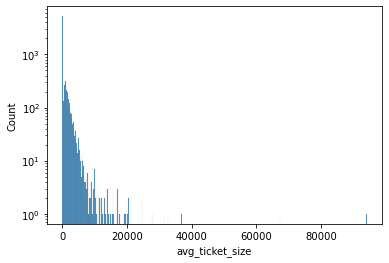

In [40]:
#check outliers
sns.histplot(data=customer_df, x="avg_ticket_size" ,log_scale=(False,True))

**we needed to make it in log scale with two axis because there are abig varity for the data but for sure**

In [41]:
customer_df[customer_df['avg_ticket_size'] >= 40000]

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount
4018,12083,TKA Supermarket,100144.0,زهراء المعادي,Cairo,زهراء المعادي,29.97192,31.33129,2020-06-24,94059.175368,95.0,92.0,2021-03-04 00:00:00,8935621.66
7876,10762,سوبر ماركت,100143.0,شبرا الخيمة,Cairo,شبرا الخيمة,31.24995,30.12371,2020-06-15,67222.200000,2.0,1.0,2020-07-08 00:00:00,134444.40


**there is no unlogical outlier and for sure they are very valuble customer to us but on other hand if we used there avg_ticket in cluster models it will be very Disperse for models like K-mean because it's very senstive to outlier and if used in model like dbscan it will be detected as outliers and will not be clusterd to any cluster. After all it's depend on what featuer we will use in cluster model. for now we will just drop this values for visualization porpose only to make pervious graph more clear**

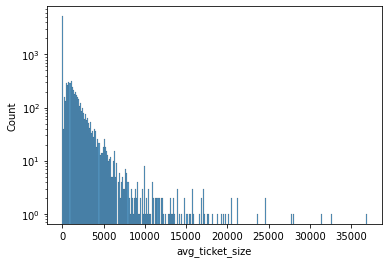

In [42]:
hist_df = customer_df.copy()
hist_df.drop(hist_df[(hist_df['avg_ticket_size'] >= 40000)].index,inplace = True)
sns.histplot(data=hist_df, x="avg_ticket_size" ,log_scale=(False,True))
plt.show()

**1- Now we can say that most of users is make transactions with avg_ticket_size less than 2500**<br>
**2- avg_ticket_size more than 5000 have low frequancy but in case sumtion they will give very valuble revenues**<br>

<AxesSubplot:xlabel='geo_latitude', ylabel='geo_longitude'>

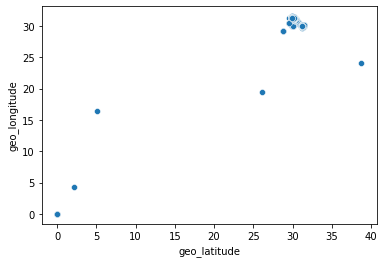

In [43]:
#check latitude with longitude from outliers and if ther will be very effective 
sns.scatterplot(data=customer_df, x="geo_latitude", y="geo_longitude")

**ALL cairo and Giza in latitude between 31 and 29 and longitude between 30 to 32 so any number not in this rang is unlogical number for our dataset**

In [44]:
#get unloical data in our dataset
unlogical_lat_long = customer_df[(customer_df['geo_latitude'] < 27)|(customer_df['geo_latitude'] > 33)|(customer_df['geo_longitude'] < 28)|(customer_df['geo_longitude'] > 34)]
unlogical_lat_long

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount
483,21127,سوبر ماركت,100143.0,شبرا الخيمة,Cairo,شبرا الخيمة,0.04395,0.00000,2020-09-09,0.000000,0.0,0.0,0,0.00
554,33786,كشك,100126.0,امبابة,Giza,امبابة,38.76099,24.06535,2020-10-26,1702.171538,13.0,0.0,2021-03-14 00:00:00,22128.23
3192,18943,سوبر ماركت,100128.0,المعادي,Cairo,المعادي,0.00000,0.00000,2020-08-16,0.000000,0.0,0.0,0,0.00
3519,17505,سوبر ماركت,100128.0,المعادي,Cairo,المعادي,5.09698,16.36067,2020-07-27,0.000000,0.0,0.0,0,0.00
4690,34647,عطارة,100158.0,ارض اللواء,Giza,ارض اللواء,0.00000,0.00000,2020-10-28,0.000000,0.0,0.0,0,0.00
4692,34889,سوبر ماركت,100169.0,المنيب,Giza,المنيب,0.00000,0.00000,2020-10-29,0.000000,0.0,0.0,0,0.00
5642,21492,سوبر ماركت,100123.0,الهرم,Giza,الهرم,0.04395,0.00000,2020-09-13,0.000000,0.0,0.0,0,0.00
6487,23706,سوبر ماركت,100158.0,ارض اللواء,Giza,أرض اللواء,0.00000,0.00000,2020-09-23,0.000000,0.0,0.0,0,0.00
7470,34398,سوبر ماركت,100112.0,العمرانية,Giza,العمرانية,2.20927,4.26897,2020-10-28,589.080000,1.0,0.0,2020-10-28 00:00:00,589.08
8531,25573,عطارة,100123.0,الهرم,Giza,الهرم,26.04467,19.52658,2020-09-29,250.000000,1.0,1.0,2020-09-29 00:00:00,250.00


In [45]:
#make new data without unlogical data to use to optomize the unlogical lat_long in customer dataframe
del_unlogic = customer_df.copy()
del_unlogic.drop(unlogical_lat_long.index,inplace = True)
del_unlogic[(del_unlogic['geo_latitude'] < 27)|(del_unlogic['geo_latitude'] > 33)|(del_unlogic['geo_longitude'] < 28)|(del_unlogic['geo_longitude'] > 34)]

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount


In [46]:
#replace the unlogical values in latitude and longitude
for area in unlogical_lat_long['area_name_ar']:
    customer_df.loc[(customer_df['area_name_ar'] == area) & ((customer_df['geo_latitude'] < 27)|(customer_df['geo_latitude'] > 33)|(customer_df['geo_longitude'] < 28)|(customer_df['geo_longitude'] > 34)), "geo_latitude"] = del_unlogic[del_unlogic['area_name_ar'] == area]['geo_latitude'].mean()
    customer_df.loc[(customer_df['area_name_ar'] == area) & ((customer_df['geo_latitude'] < 27)|(customer_df['geo_latitude'] > 33)|(customer_df['geo_longitude'] < 28)|(customer_df['geo_longitude'] > 34)), "geo_longitude"] = del_unlogic[del_unlogic['area_name_ar'] == area]['geo_longitude'].mean()


In [47]:
#check again
customer_df[(customer_df['geo_latitude'] < 27)|(customer_df['geo_latitude'] > 33)|(customer_df['geo_longitude'] < 28)|(customer_df['geo_longitude'] > 34)]

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount


In [48]:
customer_df[(customer_df['area_name_ar'] == 'العمرانية')]

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount
3391,21739,كشك,100112.0,العمرانية,Giza,العمرانية,30.006450,31.19697,2020-09-14,0.0000,0.0,0.0,0,0.00
6737,26728,سوبر ماركت,100112.0,العمرانية,Giza,العمرانية,30.007470,31.20486,2020-10-04,732.6375,4.0,1.0,2021-01-15 00:00:00,2930.55
7470,34398,سوبر ماركت,100112.0,العمرانية,Giza,العمرانية,30.003797,31.20178,2020-10-28,589.0800,1.0,0.0,2020-10-28 00:00:00,589.08
8536,26734,سوبر ماركت,100112.0,العمرانية,Giza,العمرانية,30.007240,31.20450,2020-10-04,0.0000,0.0,0.0,0,0.00
8787,13289,سوبر ماركت,100112.0,العمرانية,Giza,العمرانية,29.994030,31.20079,2020-03-18,1499.5000,2.0,2.0,2020-04-19 00:00:00,2999.00


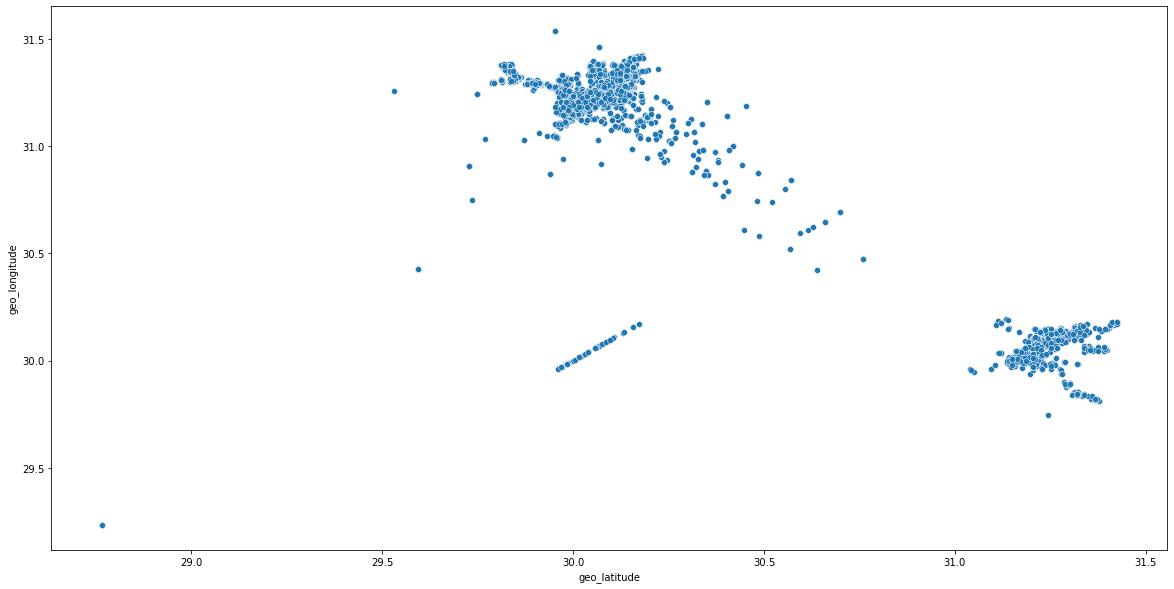

In [49]:
#plot again to see the difference
plt.figure(figsize = [20, 10])
sns.scatterplot(data=customer_df, x="geo_latitude", y="geo_longitude")
plt.show()

**according to above plot we can not depend on lat and long only and may need other featuer to make better clusters**

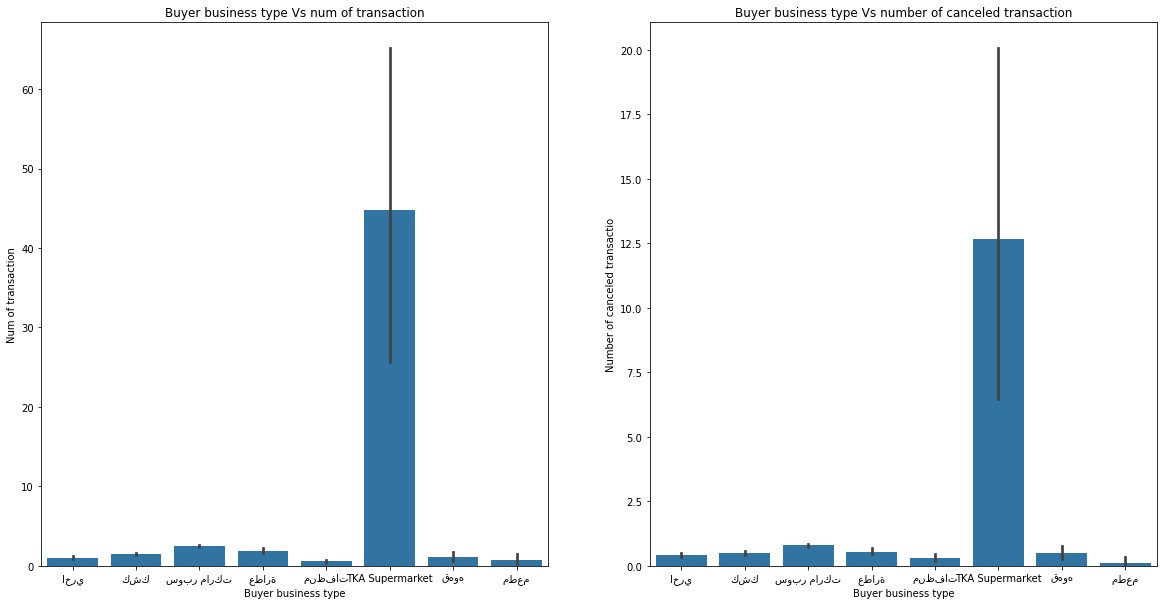

In [50]:
plt.figure(figsize = [20, 10])
base_color = sns.color_palette()[0]
 
plt.subplot(1, 2, 1)
_ = sns.barplot(data=customer_df, x='buyer_business_type', y='number_of_transactions', color=base_color)
plt.title('Buyer business type Vs num of transaction')
plt.ylabel('Num of transaction')
plt.xlabel('Buyer business type')

plt.subplot(1, 2, 2)
_ = sns.barplot(data=customer_df, x='buyer_business_type', y='number_of_cancelled_transactions', color=base_color)
plt.title('Buyer business type Vs number of canceled transaction')
plt.ylabel('Number of canceled transactio')
plt.xlabel('Buyer business type')

plt.show()

**As we see it's abovious that we have TKA Supermarket is distruip our visualization to make visualization more clear**

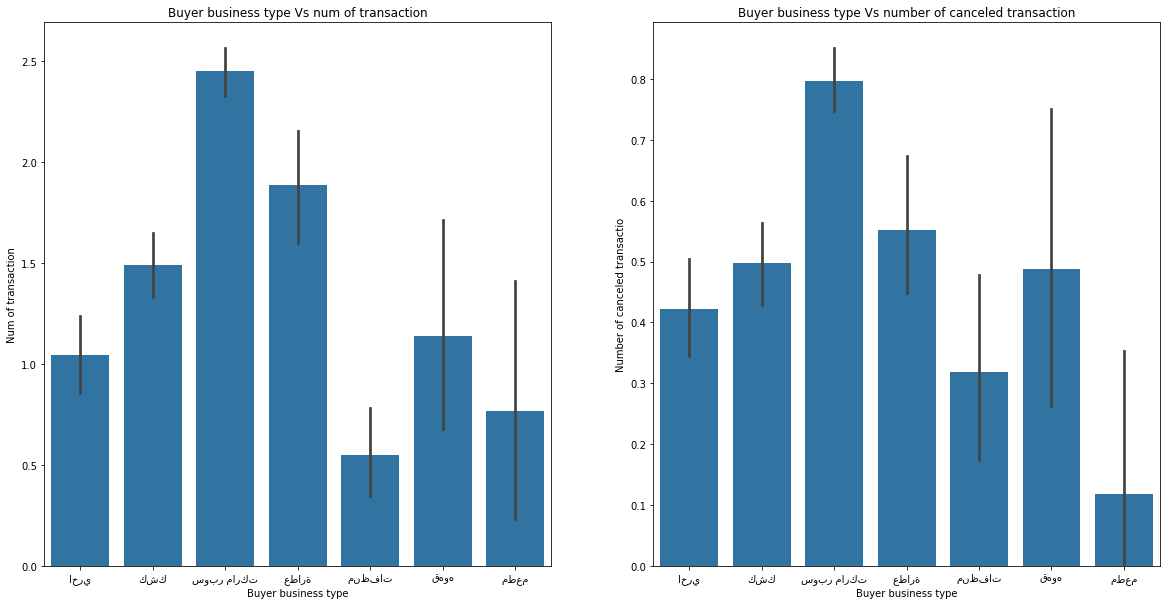

In [51]:
bar_df = customer_df.copy()
bar_df.drop(bar_df[(bar_df['buyer_business_type'] == 'TKA Supermarket')].index,inplace = True)

plt.figure(figsize = [20, 10])
base_color = sns.color_palette()[0]
 
plt.subplot(1, 2, 1)
_ = sns.barplot(data=bar_df, x='buyer_business_type', y='number_of_transactions', color=base_color)
plt.title('Buyer business type Vs num of transaction')
plt.ylabel('Num of transaction')
plt.xlabel('Buyer business type')

plt.subplot(1, 2, 2)
_ = sns.barplot(data=bar_df, x='buyer_business_type', y='number_of_cancelled_transactions', color=base_color)
plt.title('Buyer business type Vs number of canceled transaction')
plt.ylabel('Number of canceled transactio')
plt.xlabel('Buyer business type')

plt.show()

**It's almost equal but we can say in "اخري" and "منظفات" have hiegh canceled transaction in comparison with Num of transaction so we need to enhance the servise for this two category**

In [52]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9798 entries, 0 to 9813
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   customer_id                       9798 non-null   object        
 1   buyer_business_type               9798 non-null   object        
 2   district_id                       9798 non-null   object        
 3   district_name_ar                  9798 non-null   object        
 4   city_name_en                      9798 non-null   object        
 5   area_name_ar                      9798 non-null   object        
 6   geo_latitude                      9798 non-null   float64       
 7   geo_longitude                     9798 non-null   float64       
 8   registration_date                 9798 non-null   datetime64[ns]
 9   avg_ticket_size                   9798 non-null   float64       
 10  number_of_transactions            9798 non-null 

### Data Clustring <a class="anchor" id="cluster"></a>

**For data used in clustring we need to choose the feature that we want to cluster according to them because they satisfy specific requirments for poromotion so:** <br>
**1- most needed parameter for clustring is latitude and longitude because in case we have order to specific location and the truck may be filled to just half so in this case we waste truck fuel and time that we can recive other order with the remain half so to solve this problem is send poromtion to the clients in the same target location to engourge him buy and fill the other half**<br>
**2- lat and long not engouh to make clear clusters so we can use other catagorial featuer related to location like area_name or district_name_ar and district_name_ar is more better for model because it have 75 category less than area that have 200 category and it may be problem when converting to dummy variables because it will increase the complexity of the model too much so district is better from model perspictive and may have similer meaning**<br>
**3- avg_taket_size can used to cluseters users as level of payment to target them with more sutable promotion suitable for them and buyer_business_type to deliver similer item and that will save time and will be compatable in one truck**

##### so final featuers I will use in clustring
    * buyer_business_type
    * district_name_ar
    * geo_latitude
    * geo_longitude
    * avg_ticket_size
    
##### So as neassery featuer engineer steps
 **1- we need to get the dummy variable from buyer_business_type and area_name_ar**<br>
 **2- we need to normlize data before make our clustring model**

In [53]:
#get required featers from the data
df_final = customer_df[['buyer_business_type','district_name_ar','geo_latitude','geo_longitude','avg_ticket_size']]

In [54]:
#get dummy variable
df_final = pd.get_dummies(df_final, prefix=['business_type','district_name'], columns=['buyer_business_type','district_name_ar'])

In [55]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on data
norm = MinMaxScaler().fit(df_final)

# transform training data
df_final_scaled = norm.transform(df_final)

#create a dataframe
final_scaled_df = pd.DataFrame(df_final_scaled, columns=df_final.columns)

# check with head
final_scaled_df.head()

,geo_latitude,geo_longitude,avg_ticket_size,business_type_TKA Supermarket,business_type_اخري,business_type_سوبر ماركت,business_type_عطارة,business_type_قهوه,business_type_كشك,business_type_مطعم,...,district_name_مدينه نصر,district_name_مصر الجديدة,district_name_مصر القديمة,district_name_منشية ناصر,district_name_ميت عقبه,district_name_ميت نما,district_name_وادي حوف,district_name_وسط البلد,district_name_١٥ مايو,district_name_٦ اكتوبر
0,0.461669,0.833048,0.005569,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.482902,0.822212,0.028339,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.361630,0.726910,0.015515,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.361630,0.726910,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.405790,0.910301,0.059731,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  Dbscan model 
##### Key prformance of dbscan model
**1- outliers not effected on this model**<br>
**2- dbscan can detect arbitary shapes and nearly divided clusters using distances between points so it's good for our case**<br>
**3- time and sace complexity is low relative to other clustring algorithms**

In [56]:
from sklearn.cluster import DBSCAN
import numpy as np

clustering = DBSCAN(eps=1.4142135, min_samples=280).fit(final_scaled_df)
clustering.labels_

array([-1, -1, -1, ..., -1,  1,  1], dtype=int64)

In [57]:
clustering.labels_[0:100]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1,
        1,  1,  1,  2,  1, -1,  1,  3, -1,  2,  2, -1,  4, -1,  1,  2, -1,
       -1, -1, -1,  3,  4, -1, -1, -1,  4,  4,  2,  1,  3,  5,  5,  4,  5,
        4,  5, -1, -1,  6, -1,  5,  5, -1,  3, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  7, -1, -1,  7, -1,  5,  5, -1, -1,  6, -1,  8, -1,  6,
       -1, -1, -1, -1,  5, -1, -1, -1, -1, -1,  3, -1, -1, -1,  9],
      dtype=int64)

In [58]:
type(clustering.labels_)

numpy.ndarray

In [59]:
np.unique(clustering.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [60]:
customer_df['clusters'] = pd.DataFrame(clustering.labels_)

In [61]:
customer_df.head(100)

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount,clusters
0,47,اخري,100123.0,الهرم,Giza,الهرم,29.993440,31.152190,2020-07-06,523.786667,3.0,3.0,2020-11-12 00:00:00,1571.36,-1.0
1,634,كشك,100140.0,مصر القديمة,Cairo,مصر القديمة,30.049865,31.127212,2020-01-20,2665.551667,6.0,4.0,2020-08-07 00:00:00,15993.31,-1.0
2,841,اخري,100128.0,المعادي,Cairo,المعادي,29.727602,30.907548,2020-01-23,1459.375000,6.0,2.0,2020-12-15 00:00:00,8756.25,-1.0
3,863,اخري,100128.0,المعادي,Cairo,المعادي,29.727602,30.907548,2020-01-23,0.000000,0.0,0.0,0,0.00,-1.0
4,986,اخري,100125.0,حلوان,Cairo,المعصرة,29.844950,31.330250,2020-01-27,5618.270000,1.0,1.0,2020-06-14 00:00:00,5618.27,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6704,سوبر ماركت,100107.0,عين شمس,Cairo,عين شمس,30.143670,31.321440,2020-05-17,2437.785000,2.0,1.0,2021-03-03 00:00:00,4875.57,3.0
96,6782,سوبر ماركت,100159.0,حي الجيزة,Giza,محطة القطار,30.008160,31.209960,2020-05-17,824.062500,4.0,1.0,2020-07-28 00:00:00,3296.25,-1.0
97,6792,سوبر ماركت,100151.0,عزبة النخل,Cairo,عزبة النخل,30.301429,31.105969,2020-05-17,0.000000,0.0,0.0,0,0.00,-1.0
98,7032,سوبر ماركت,100149.0,الزاويه الحمراء,Cairo,الزاويه الحمراء,30.093520,31.273670,2020-05-18,3206.810000,3.0,0.0,2021-03-11 00:00:00,9620.43,-1.0


In [62]:
customer_df['clusters'].value_counts()

-1.0    5668
 6.0     752
 9.0     542
 0.0     445
 5.0     443
 7.0     397
 8.0     332
 2.0     306
 4.0     304
 1.0     300
 3.0     294
Name: clusters, dtype: int64

In [63]:
customer_df[customer_df['clusters'] == 4].head(60)

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount,clusters
29,3000,سوبر ماركت,100128.0,المعادي,Cairo,المعادي,29.747900,31.242760,2020-03-29,1386.747500,8.0,4.0,2021-03-13 00:00:00,11093.98,4.0
38,3246,سوبر ماركت,100128.0,المعادي,Cairo,المعادي,29.727602,30.907548,2020-04-12,3606.663333,9.0,2.0,2021-03-06 00:00:00,32459.97,4.0
42,3361,سوبر ماركت,100128.0,المعادي,Cairo,المعادي,29.727602,30.907548,2020-04-15,0.000000,0.0,0.0,0,0.00,4.0
43,3382,سوبر ماركت,100128.0,المعادي,Cairo,المعادي,29.972600,31.251500,2020-04-15,1828.053077,13.0,1.0,2021-03-10 00:00:00,23764.69,4.0
49,3561,سوبر ماركت,100128.0,المعادي,Cairo,المعادي,29.976530,31.257150,2020-04-21,896.828000,5.0,1.0,2021-01-30 00:00:00,4484.14,4.0
51,3607,سوبر ماركت,100128.0,المعادي,Cairo,حدائق المعادي,29.971370,31.249560,2020-04-23,877.010000,1.0,1.0,2020-11-06 00:00:00,877.01,4.0
127,8077,سوبر ماركت,100128.0,المعادي,Cairo,المعادي,30.166620,31.328870,2020-06-02,527.500000,2.0,1.0,2020-06-07 00:00:00,1055.00,4.0
204,10627,سوبر ماركت,100128.0,المعادي,Cairo,البساتين,29.983100,31.265300,2020-06-14,692.173333,3.0,1.0,2021-02-22 00:00:00,2076.52,4.0
211,10929,سوبر ماركت,100128.0,المعادي,Cairo,المعادي,29.981990,31.261030,2020-06-16,803.376667,3.0,0.0,2021-01-30 00:00:00,2410.13,4.0
217,11017,سوبر ماركت,100128.0,المعادي,Cairo,حدائق المعادي,29.970100,31.257800,2020-06-16,2000.101579,19.0,5.0,2021-02-21 00:00:00,38001.93,4.0


In [64]:
customer_df[customer_df['clusters'] == 9]['district_name_ar'].value_counts()

شبرا الخيمة        220
فيصل                33
الهرم               25
امبابة              20
شبرا مصر            19
المرج               17
عين شمس             16
العمرانية           15
بولاق الدكرور       14
حدائق القبة         13
الوراق              11
المعادي             11
المطرية             11
مدينه نصر           10
حلوان               10
الزاويه الحمراء      9
الوايلي              9
المنيب               9
عزبة النخل           8
الخصوص               7
مصر القديمة          7
الزيتون              6
مدينة السلام         6
ميت نما              4
ارض اللواء           4
العباسية             3
الدقي                3
المقطم               2
وسط البلد            2
٦ اكتوبر             2
القناطر الخيرية      2
شبرا الخيمه          2
حدائق حلوان          1
دار السلام           1
النزهه الجديده       1
Others               1
Test Mainal          1
المنيل               1
المهندسين            1
بشتيل                1
جسر السويس           1
زهراء المعادي        1
حي الجيزة            1
ميت عقبه   

In [65]:
customer_df[customer_df['clusters'] == 4].describe()

,geo_latitude,geo_longitude,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,total_orders_amount,clusters
count,304.000000,304.000000,304.000000,304.000000,304.000000,3.040000e+02,304.0
mean,30.128734,31.090050,1035.735771,2.529605,0.628289,1.090205e+04,4.0
std,0.382702,0.367829,1926.588663,14.718226,2.713490,1.142280e+05,0.0
min,29.727602,29.887380,0.000000,0.000000,0.000000,0.000000e+00,4.0
25%,29.976830,31.152568,0.000000,0.000000,0.000000,0.000000e+00,4.0
50%,30.018880,31.240195,0.000000,0.000000,0.000000,0.000000e+00,4.0
75%,30.111600,31.266800,1476.861167,2.000000,1.000000,4.076543e+03,4.0
max,31.423590,31.382850,15750.000000,253.000000,44.000000,1.965953e+06,4.0


**According to result of the model we can determine the following**<br>
**1- need to adjust lat and long values to make model more sense about them espeaelly the fars ones in first cluster**<br>
**2- model is already sense and differentiate the regions that have far lat and long values like "فيصل" and that very good for getting poromtion for same region and save time and fuel of truck that maybe make atrip with a half capacity so in this time we offered attractive poromtion for same region we are going to to fill the truck**

#### Prefered promotions for every cluster
  * cluster -1: this cluster is cover the most clients that don't exceed 5000 for averge ticket size so it's cover supermarket and koshk products so it will be good to give him over related to supermarket products
  * cluster  0: most of this category in اخري business type and not use app yet so it should send very attractive poromotions to engourge thim to use the app for first time
  * cluster  1: this cluster is very usfel for my case .because most of regions of this cluster from helwan so most sutable poromotion that related to his business type (supermarket in most records) and fit with empty places in trucks that have trips for this region
  * cluster  2: same as cluster 1 but for Nasr city
  * cluster  3: same as cluster 1 but for Ain shams
  * cluster  4: same as cluster 1 but for elMaady
  * cluster  5: same as cluster 1 but for elMarg
  * cluster  6: same as cluster 1 but for Faisl
  * cluster  7: same as cluster 1 but for elharm
  * cluster  8: same as cluster 1 but for Embaba
  * cluster  9: same as cluster 1 but for shobra elkhema

In [66]:
customer_df['promotion_type']= ""

In [67]:
customer_df.loc[customer_df.clusters == -1, "promotion_type"] = 'supermarket product promotions'
customer_df.loc[customer_df.clusters ==  0, "promotion_type"] = 'New user promotions'
customer_df.loc[customer_df.clusters ==  1, "promotion_type"] = 'Reigon_truck promotions'
customer_df.loc[customer_df.clusters ==  2, "promotion_type"] = 'Reigon_truck promotions'
customer_df.loc[customer_df.clusters ==  3, "promotion_type"] = 'Reigon_truck promotions'
customer_df.loc[customer_df.clusters ==  4, "promotion_type"] = 'Reigon_truck promotions'
customer_df.loc[customer_df.clusters ==  5, "promotion_type"] = 'Reigon_truck promotions'
customer_df.loc[customer_df.clusters ==  6, "promotion_type"] = 'Reigon_truck promotions'
customer_df.loc[customer_df.clusters ==  7, "promotion_type"] = 'Reigon_truck promotions'
customer_df.loc[customer_df.clusters ==  8, "promotion_type"] = 'Reigon_truck promotions'
customer_df.loc[customer_df.clusters ==  9, "promotion_type"] = 'Reigon_truck promotions'

customer_df.head(20)

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount,clusters,promotion_type
0,47,اخري,100123.0,الهرم,Giza,الهرم,29.993440,31.152190,2020-07-06,523.786667,3.0,3.0,2020-11-12 00:00:00,1571.36,-1.0,supermarket product promotions
1,634,كشك,100140.0,مصر القديمة,Cairo,مصر القديمة,30.049865,31.127212,2020-01-20,2665.551667,6.0,4.0,2020-08-07 00:00:00,15993.31,-1.0,supermarket product promotions
2,841,اخري,100128.0,المعادي,Cairo,المعادي,29.727602,30.907548,2020-01-23,1459.375000,6.0,2.0,2020-12-15 00:00:00,8756.25,-1.0,supermarket product promotions
3,863,اخري,100128.0,المعادي,Cairo,المعادي,29.727602,30.907548,2020-01-23,0.000000,0.0,0.0,0,0.00,-1.0,supermarket product promotions
4,986,اخري,100125.0,حلوان,Cairo,المعصرة,29.844950,31.330250,2020-01-27,5618.270000,1.0,1.0,2020-06-14 00:00:00,5618.27,-1.0,supermarket product promotions
5,1008,كشك,100128.0,المعادي,Cairo,المعادي,29.727602,30.907548,2020-01-28,0.000000,0.0,0.0,0,0.00,-1.0,supermarket product promotions
6,1068,اخري,100125.0,حلوان,Cairo,حدايق حلوان,30.080231,31.107671,2020-01-21,1989.783333,18.0,11.0,2021-03-01 00:00:00,35816.10,-1.0,supermarket product promotions
7,1119,اخري,100128.0,المعادي,Cairo,المعادي,29.727602,30.907548,2020-01-22,0.000000,0.0,0.0,0,0.00,-1.0,supermarket product promotions
8,1492,اخري,100206.0,المريوطيه - فيصل,Giza,المريوطيه - فيصل,31.149290,29.998060,2020-01-28,5664.990000,5.0,1.0,2021-03-06 00:00:00,28324.95,-1.0,supermarket product promotions
9,1516,اخري,100000.0,Others,Cairo,Others,30.071869,31.297946,2020-01-28,0.000000,0.0,0.0,0,0.00,0.0,New user promotions


In [68]:
customer_df.to_csv('Customer_Clusters_Promotions_df.csv')